In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./car_miles_per_gallon.csv')
df

,Name,Year,Origin,Cylinders,Displacement,Horsepower,Weight,Acceleration,MPG
0,Chevrolet Chevelle Malibu,2015,1,8,307.0,130.0,3504,12.0,8.0
1,Buick Skylark 320,2015,1,8,350.0,165.0,3693,11.5,15.0
2,Plymouth Satellite,2015,1,8,318.0,150.0,3436,11.0,18.0
3,Amc Rebel Sst,2015,1,8,304.0,150.0,3433,12.0,16.0
4,Ford Torino,2015,1,8,302.0,140.0,3449,10.5,17.0
...,...,...,...,...,...,...,...,...,...
393,Ford Mustang Gl,2003,1,4,140.0,86.0,2790,15.6,27.0
394,Vw Pickup,2003,2,4,97.0,52.0,2130,24.6,44.0
395,Dodge Rampage,2003,1,4,135.0,84.0,2295,11.6,32.0
396,Ford Ranger,2003,1,4,120.0,79.0,2625,18.6,28.0


In [17]:
df[df.isnull()].sum()

Name              0
Year            0.0
Origin          0.0
Cylinders       0.0
Displacement    0.0
Horsepower      0.0
Weight          0.0
Acceleration    0.0
MPG             0.0
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          398 non-null    object 
 1   Year          398 non-null    int64  
 2   Origin        398 non-null    int64  
 3   Cylinders     398 non-null    int64  
 4   Displacement  398 non-null    float64
 5   Horsepower    392 non-null    float64
 6   Weight        398 non-null    int64  
 7   Acceleration  398 non-null    float64
 8   MPG           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


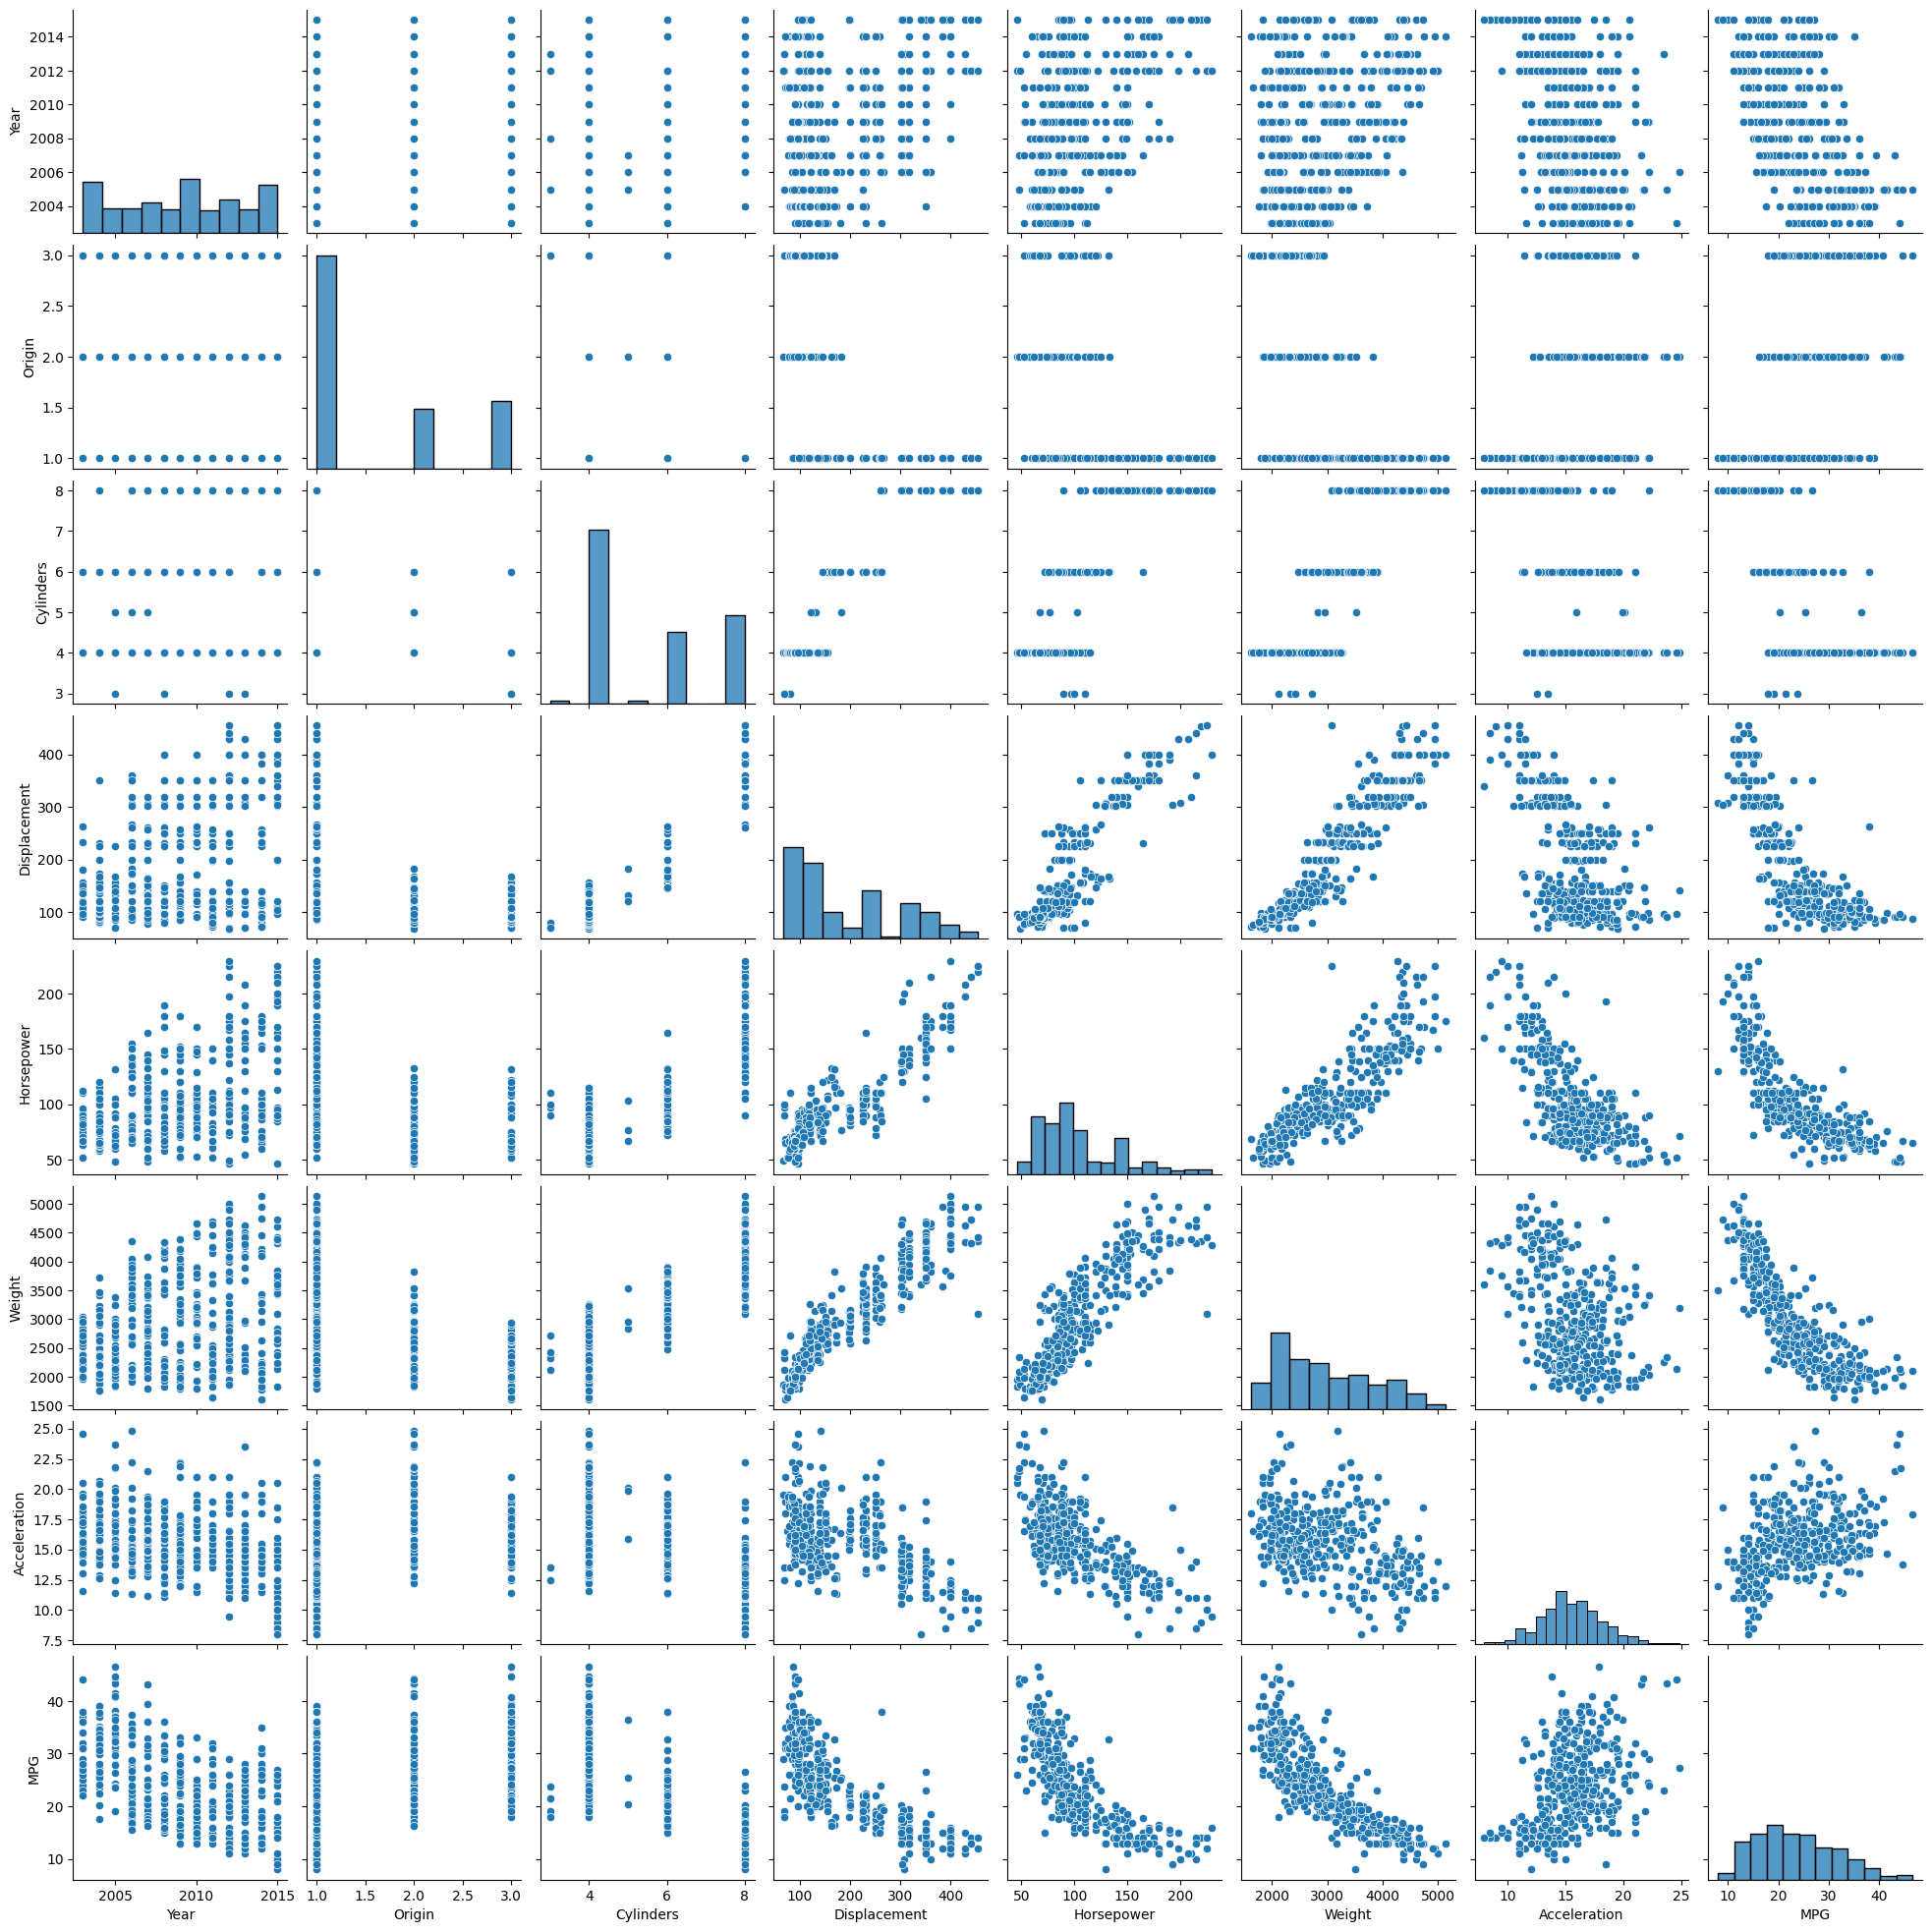

In [8]:
sns.pairplot(df)

In [11]:
df.dropna(inplace=True)

In [12]:
df2 = df[ ['Displacement', 'Horsepower'] ]
df2.head()

,Displacement,Horsepower
0,307.0,130.0
1,350.0,165.0
2,318.0,150.0
3,304.0,150.0
4,302.0,140.0


In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=3, random_state=0)

In [21]:
model.fit(df2)

KMeans(n_clusters=3, random_state=0)

In [23]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0,

<Axes: xlabel='Displacement', ylabel='Horsepower'>

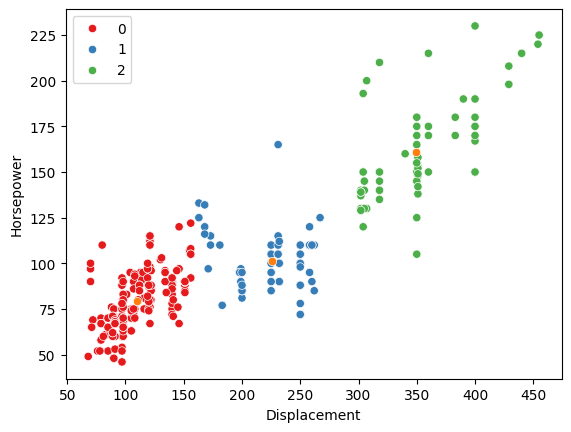

In [34]:
sns.scatterplot(data = df2, x='Displacement', y = 'Horsepower', hue = model.labels_, palette = 'Set1')
sns.scatterplot(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1])

In [26]:
model.cluster_centers_

array([[110.28672986,  79.50236967],
       [225.44578313, 101.40963855],
       [349.25510204, 160.81632653]])

In [37]:
model.predict([[200,100]])

C:\Users\francis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [43]:
df3  = df[ ['Displacement','Acceleration']]
df3

,Displacement,Acceleration
0,307.0,12.0
1,350.0,11.5
2,318.0,11.0
3,304.0,12.0
4,302.0,10.5
...,...,...
393,140.0,15.6
394,97.0,24.6
395,135.0,11.6
396,120.0,18.6


In [44]:
model2 = KMeans(n_clusters=3, random_state=0)
model2.fit(df3)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Displacement', ylabel='Acceleration'>

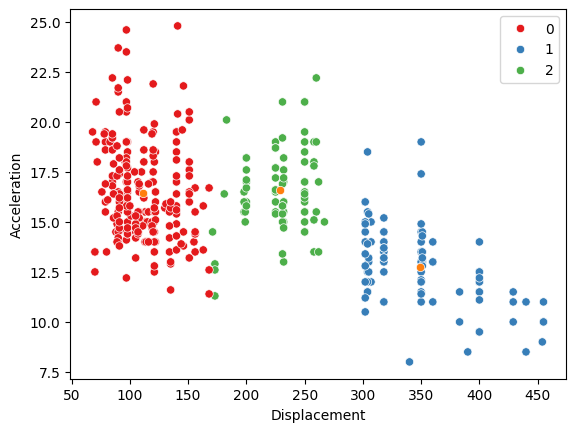

In [46]:
sns.scatterplot(data = df3, x='Displacement', y = 'Acceleration', hue = model2.labels_, palette = 'Set1')
sns.scatterplot(x = model2.cluster_centers_[:,0], y = model2.cluster_centers_[:,1])

<Axes: xlabel='Weight', ylabel='Acceleration'>

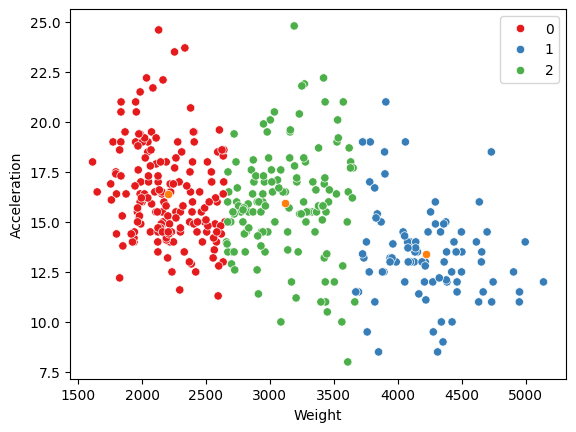

In [48]:
df4  = df[ ['Weight','Acceleration']]
model3 = KMeans(n_clusters=3, random_state=0)
model3.fit(df4)
sns.scatterplot(data = df4, x='Weight', y = 'Acceleration', hue = model3.labels_, palette = 'Set1')
sns.scatterplot(x = model3.cluster_centers_[:,0], y = model3.cluster_centers_[:,1])

In [49]:
from sklearn.preprocessing import StandardScaler

C:\Users\francis\AppData\Local\Temp\ipykernel_6052\27217614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Weight', 'Acceleration']] = df2_scaled


<Axes: xlabel='Weight', ylabel='Acceleration'>

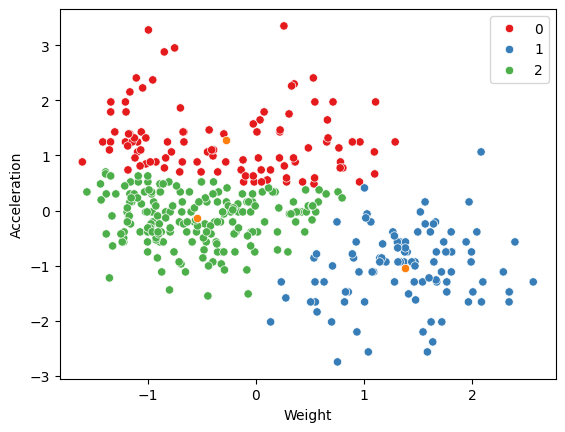

In [70]:
scaler = StandardScaler()
df2 = df[ ['Weight', 'Acceleration']]
df2_scaled = scaler.fit_transform(df2)
df2[['Weight', 'Acceleration']] = df2_scaled

model = KMeans(n_clusters=3, random_state=0)
model.fit(df2)
sns.scatterplot(data = df2, x='Weight', y = 'Acceleration', hue = model.labels_, palette = 'Set1')
sns.scatterplot(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1])

In [71]:
a = scaler.transform([[3500,12]])
model.predict(a)

C:\Users\francis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\francis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [72]:
from sklearn import metrics

In [73]:
score = metrics.silhouette_score(df2, model.labels_)
score

0.41647461457013557

In [75]:
for k in range(2,50):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df2)
    score = metrics.silhouette_score(df2, model.labels_)
    print(score)

0.4838500863834756
0.41647461457013557
0.4157345903483939
0.3967435896899267
0.364486106828356
0.35907190849869136
0.32291409708584307
0.35205758627044537
0.3620198068335909
0.36195511455610097
0.3498430700337319
0.35598761870601237
0.35393619008228167
0.34632497929010225
0.34868666566979717
0.36994199593020705
0.37005831131288824
0.3657445403642272
0.3654257971237449
0.3781611817191493
0.3766834187509832
0.35528012146559684
0.34603557989340755
0.3561421596217345
0.3582062734774811
0.3587374606773737
0.3629480160935556
0.3697328377288078
0.36307599643898125
0.3588301434271884
0.36274025317535613
0.3668580953317908
0.3720758133408275
0.3800235668089388
0.3642071702987471
0.36338285601933784
0.35322315586226094
0.34783260497111745
0.34322453508461387
0.3440462800349964
0.3475066482006562
0.347967839108729
0.34988786356629126
0.3482655713829952
0.3545305023024331
0.35902447176652186
0.35885414624163126
0.3598349376759423
